In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import heapq
import numpy as np

In [2]:
# helper function
def print_graph(G):

    elarge = [(u, v) for (u, v, d) in G.edges(data=True)]

    pos = nx.spring_layout(G,k=1000, seed=7)  # positions for all nodes - seed for reproducibility

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=500)

    # edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge, width=2)

 
    # node labels
    nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
    # edge weight labels
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels)

    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

In [3]:
""" n = 100
G = nx.complete_graph(n)
for (u,v,w) in G.edges(data=True):
    w['weight'] = random.randint(1,10)

print_graph(G) """

" n = 100\nG = nx.complete_graph(n)\nfor (u,v,w) in G.edges(data=True):\n    w['weight'] = random.randint(1,10)\n\nprint_graph(G) "

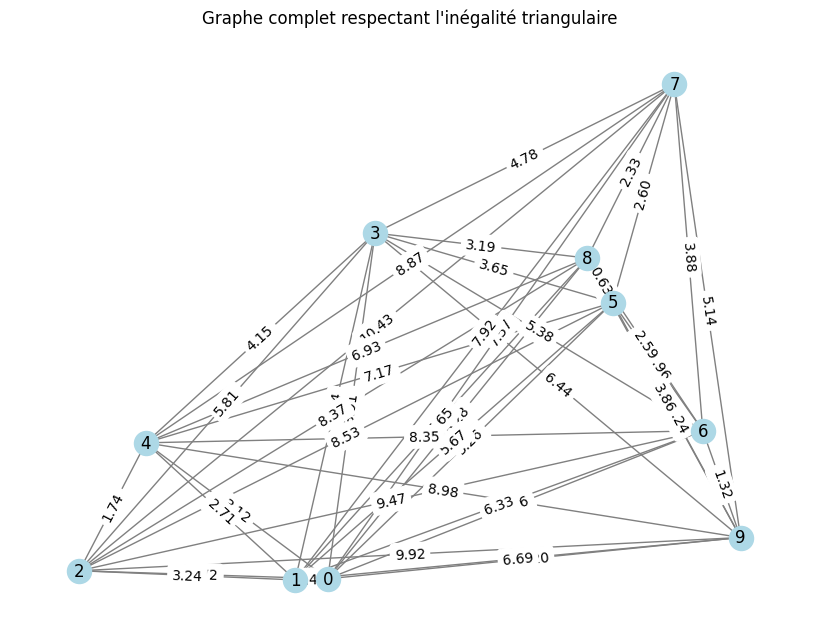

In [4]:
def generer_graphe_tsp(n):
    # Générer des positions aléatoires dans un espace 2D
    positions = {i: np.random.rand(2) for i in range(n)}
    
    # Créer un graphe complet respectant l'inégalité triangulaire
    G = nx.complete_graph(n)
    for i in range(n):
        for j in range(i + 1, n):
            # Calculer la distance euclidienne entre les points
            poids = np.linalg.norm(positions[i] - positions[j]) * 10
            G[i][j]['weight'] = poids
            G[j][i]['weight'] = poids  # Graphe non orienté

    return G, positions

# Paramètre : nombre de nœuds
n = 10
G, positions = generer_graphe_tsp(n)

# Dessiner le graphe
plt.figure(figsize=(8, 6))
nx.draw(G, pos=positions, with_labels=True, node_color='lightblue', edge_color='gray')
labels = {(i, j): f"{G[i][j]['weight']:.2f}" for i, j in G.edges()}
nx.draw_networkx_edge_labels(G, pos=positions, edge_labels=labels)
plt.title("Graphe complet respectant l'inégalité triangulaire")
plt.show()

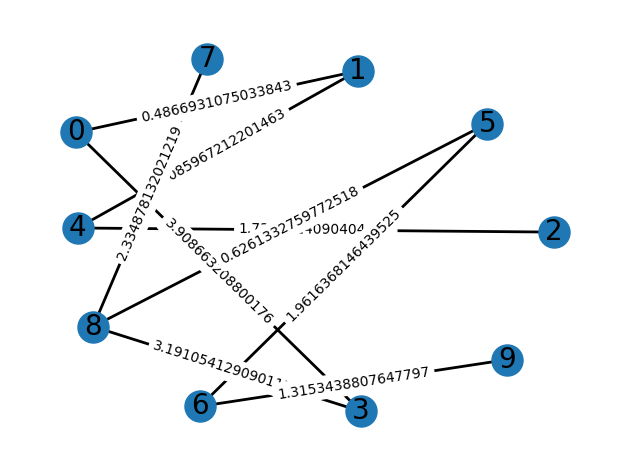

In [5]:
#weight = 0
T = nx.minimum_spanning_tree(G)

#for _,_,w in T.edges(data=True):
#    weight += w['weight']


print_graph(T)


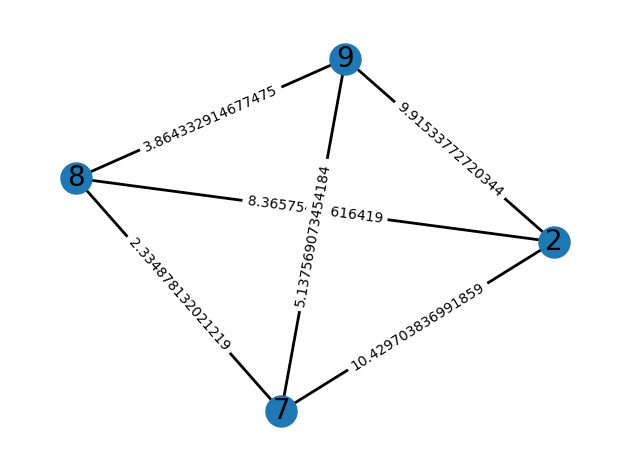

In [6]:
O = [node for node in T.nodes if T.degree[node] % 2 != 0]
sub_G = G.subgraph(O)
print_graph(sub_G)

{(2, 9), (7, 8)}
[(0, 1), (0, 3), (1, 4), (2, 4), (3, 8), (5, 8), (5, 6), (6, 9), (7, 8)]


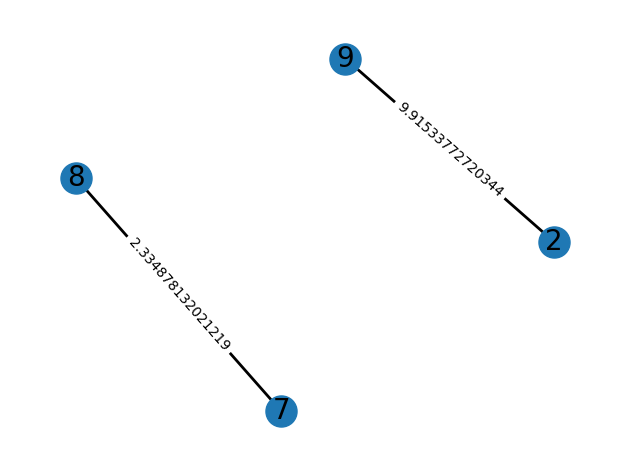

In [7]:
M = nx.algorithms.matching.min_weight_matching(sub_G)
assert(nx.algorithms.is_perfect_matching(sub_G,M))
#H = nx.MultiGraph(G.edges(data=True))
print(M)
print(list(T.edges))
H1 = G.edge_subgraph(list(M))
H2 = G.edge_subgraph(list(T.edges))
print_graph(H1)

[(8, 7), (8, 7), (8, 3), (8, 5), (9, 2), (9, 6), (2, 4), (0, 1), (0, 3), (1, 4), (5, 6)]


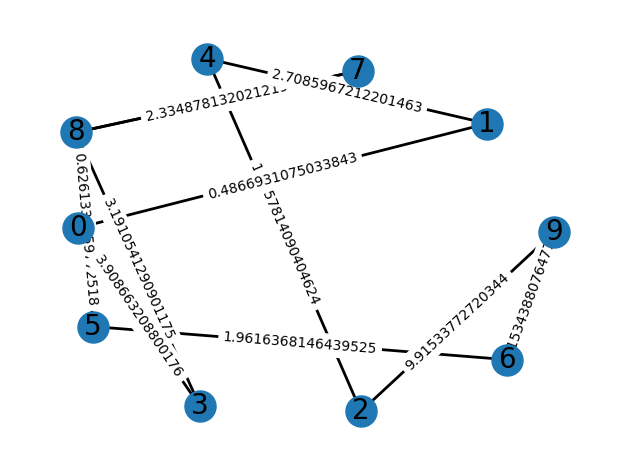

In [8]:
# Create a new MultiGraph and combine
H = nx.MultiGraph()
H.add_edges_from(H1.edges(data=True))
H.add_edges_from(H2.edges(data=True))
print(H.edges())
print_graph(H)

[(8, 5), (8, 3), (8, 7), (8, 7), (5, 6), (6, 9), (9, 2), (2, 4), (4, 1), (1, 0), (0, 3)]


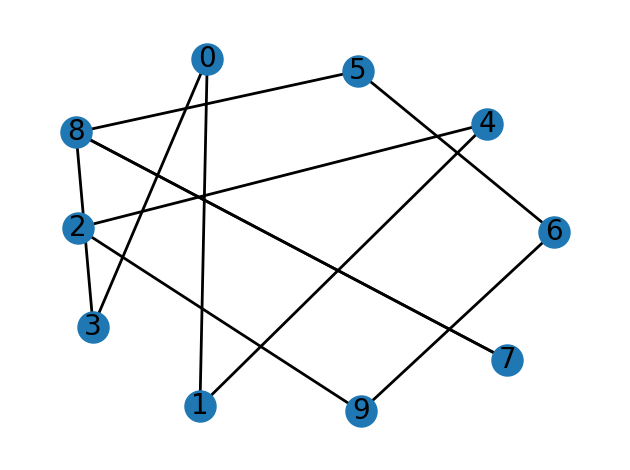

In [9]:
EH = nx.MultiGraph(nx.algorithms.eulerian_circuit(H))
print(EH.edges())
print_graph(EH)

In [10]:
[edge for edge in nx.algorithms.eulerian_circuit(H)]

[(8, 5),
 (5, 6),
 (6, 9),
 (9, 2),
 (2, 4),
 (4, 1),
 (1, 0),
 (0, 3),
 (3, 8),
 (8, 7),
 (7, 8)]

In [11]:
visited = []
edges = []
for edge in nx.algorithms.eulerian_circuit(H):
    if edge[0] not in visited:
        visited.append(edge[0])
        edges.append(edge)
visited


[8, 5, 6, 9, 2, 4, 1, 0, 3, 7]

In [12]:
edge_list_tsp = [(visited[i],visited[i+1]) for i in range(len(visited)-1)]
edge_list_tsp.append((visited[-1],visited[0]))
edge_list_tsp

[(8, 5),
 (5, 6),
 (6, 9),
 (9, 2),
 (2, 4),
 (4, 1),
 (1, 0),
 (0, 3),
 (3, 7),
 (7, 8)]

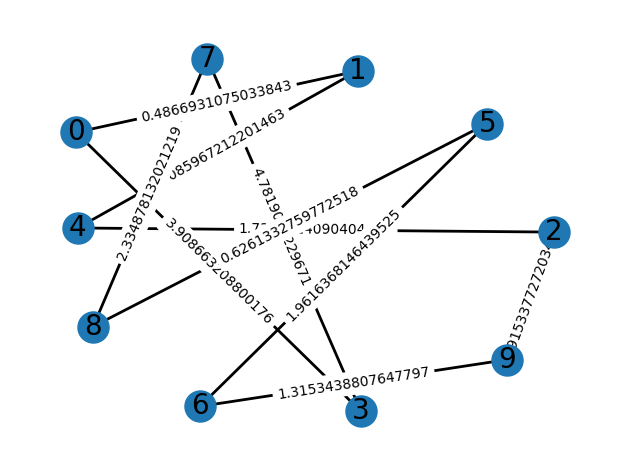

[(0, 1), (0, 3), (1, 4), (2, 4), (2, 9), (3, 7), (5, 6), (5, 8), (6, 9), (7, 8)]


In [13]:
final_G = G.edge_subgraph(edge_list_tsp)
print_graph(final_G)
print(final_G.edges)
assert nx.has_eulerian_path(final_G), 'Error: No Eulerian Path in final graph'

[0, 3, 8, 7, 5, 6, 9, 2, 4, 1, 0]


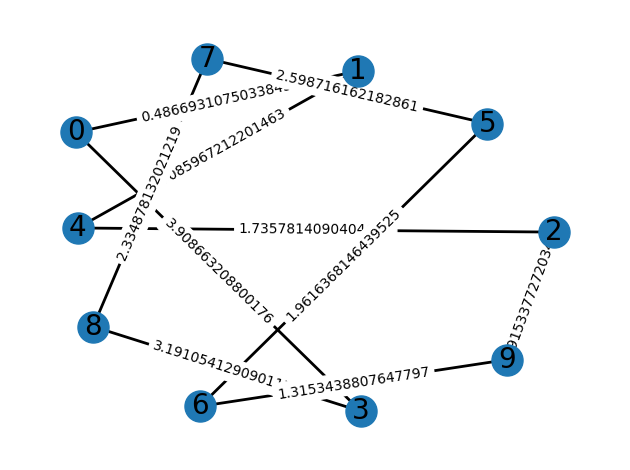

[(0, 3), (3, 8), (8, 7), (7, 5), (5, 6), (6, 9), (9, 2), (2, 4), (4, 1), (1, 0), (0, 0)]


In [14]:
visited_nx = nx.approximation.traveling_salesman_problem(G)
print(visited_nx)
edge_list_tsp_nx = [(visited_nx[i],visited_nx[i+1]) for i in range(len(visited_nx)-1)]
edge_list_tsp_nx.append((visited_nx[-1],visited_nx[0]))
final_G_nx = G.edge_subgraph(edge_list_tsp_nx)
print_graph(final_G_nx)
print(edge_list_tsp_nx)
assert nx.has_eulerian_path(final_G), 'Error: No Eulerian Path in final graph'

In [15]:
print(final_G.size(weight = 'weight'))
print(final_G_nx.size(weight = 'weight'))

29.774964400141926
30.156701292470537


In [ ]:
blocked = [(1,2),(3,4)]
def shortcut(Vm, Pcr):
    Vm_1 = Vm.copy()
    Em = []
    i = 0
    j = 1
    while j <= len(Vm):
        vmi = Vm_1[i]
        vmj = Vm_1[j]
        current_edge = (vmi,vmj) 
        if not current_edge in blocked:
            Vm_1.remove(vmj)
            Pcr.append(current_edge)
            i = j
            j = i + 1
        else: # blockage
            Em.append(current_edge)
            l = 1
            vl = Vm_1[i+l]
            vmi_vl_edge = (vmi, vl)
            vl_vmj_edge = (vl, vmj)
            vmi_vl_blocked = vmi_vl_edge in blocked
            vl_vmj_blocked = vl_vmj_edge in blocked
            while not vl == vmj and (vmi_vl_blocked or vl_vmj_blocked):
                if vmi_vl_blocked:
                    Em.append(vmi_vl_edge)
                if vl_vmj_blocked:
                    Em.append(vl_vmj_edge)
                l += 1
            if not vl == vmj:
                Vm_1.remove(vmj)
                Pcr.append(vmi_vl_edge)
                Pcr.append(vl_vmj_edge)
                i = j
                j =  i + 1
            else:
                j = j + 1
    return Vm_1



In [ ]:

from christofides_p import travelling_salesman_christofides, generer_graphe_tsp
def cyclic_routing(G):
    Vm = G.nodes()
    Pcr = []
    P, _ = travelling_salesman_christofides(G)
    m = 1
    last_m_end = -1 # node where last iteration ended
    dir = 1
    while not Vm.empty():
        if m == 1 or last_m_end == Vm[0]:
            Vm_1 = shortcut(Vm,Pcr,dir)
            if Vm == Vm_1:
                dir *= -1
                shortcut(Vm, Pcr, dir)
        else:
            dir *= -1
            shortcut(Vm, Pcr, dir)
        m += 1
